In [3]:
from __future__ import division

import os
import urllib, cStringIO

import pymongo as pm

import numpy as np
import scipy.stats as stats
import pandas as pd
import json
import re

from PIL import Image
import base64
import sys

import matplotlib
from matplotlib import pylab, mlab, pyplot
%matplotlib inline
from IPython.core.pylabtools import figsize, getfigs
plt = pyplot
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

/usr/local/lib/python2.7/dist-packages/scipy/special/__init__.py:640: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ufuncs import *
/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._solve_toeplitz import levinson
/usr/local/lib/python2.7/dist-packages/scipy/linalg/__init__.py:191: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._decomp_update import *
/usr/local/lib/python2.7/dist-packages/scipy/special/_ellip_harm.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ellip_harm_2 import _ellipsoid, _ellipsoid_norm
/usr/local/lib/python2.7/dist-packages/scipy/sparse/lil.py:16: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . impo

ImportError: cannot import name cbook

## setup

In [4]:
# directory & file hierarchy
proj_dir = os.path.abspath('../../..')
analysis_dir = os.getcwd()
results_dir = os.path.join(proj_dir,'results')
plot_dir = os.path.join(results_dir,'plots')
csv_dir = os.path.join(results_dir,'csv')
exp_dir = os.path.abspath(os.path.join(proj_dir,'experiments'))
sketch_dir = os.path.abspath(os.path.join(proj_dir,'sketches'))

## add helpers to python path
if os.path.join(proj_dir,'analysis','python') not in sys.path:
    sys.path.append(os.path.join(proj_dir,'analysis','python'))
    
if not os.path.exists(results_dir):
    os.makedirs(results_dir)
    
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)   
    
if not os.path.exists(csv_dir):
    os.makedirs(csv_dir)       
    
# Assign variables within imported analysis helpers
import analysis_helpers as h
if sys.version_info[0]>=3:
    from importlib import reload
reload(h)

ImportError: cannot import name cbook

In [5]:
# set vars 
auth = pd.read_csv('auth.txt', header = None) # this auth.txt file contains the password for the sketchloop user
pswd = auth.values[0][0]
user = 'sketchloop'
host = 'rxdhawkins.me' ## cocolab ip address

# have to fix this to be able to analyze from local
import pymongo as pm
conn = pm.MongoClient('mongodb://sketchloop:' + pswd + '@127.0.0.1')
db = conn['3dObjects']
coll = db['graphical_conventions']

# which iteration name should we use?
iterationName1 = 'run3_size4_waiting'
iterationName2 = 'run4_generalization'

IOError: File auth.txt does not exist

In [6]:
## list of researcher mturk worker ID's to ignore
jefan = ['A1MMCS8S8CTWKU','A1MMCS8S8CTWKV','A1MMCS8S8CTWKS']
hawkrobe = ['A1BOIDKD33QSDK']
megsano = ['A1DVQQLVZR7W6I']
researchers = jefan + hawkrobe + megsano 

In [4]:
# run 3 
## get total number of stroke and clickedObj events in the collection as a whole
S1 = coll.find({ '$and': [{'iterationName':iterationName1}, {'eventType': 'stroke'}]}).sort('time')
C1 = coll.find({ '$and': [{'iterationName':iterationName1}, {'eventType': 'clickedObj'}]}).sort('time')
print str(S1.count()) + ' stroke records in the database.'
print str(C1.count()) + ' clickedObj records in the database.' # previously 722 so 882 ideally 

7562 stroke records in the database.
1379 clickedObj records in the database.


In [5]:
## get total number of stroke and clickedObj events in the collection as a whole
S2 = coll.find({ '$and': [{'iterationName':iterationName2}, {'eventType': 'stroke'}]}).sort('time')
C2 = coll.find({ '$and': [{'iterationName':iterationName2}, {'eventType': 'clickedObj'}]}).sort('time')
print str(S2.count()) + ' stroke records in the database.'
print str(C2.count()) + ' clickedObj records in the database.' # previously 722 so 882 ideally 

7935 stroke records in the database.
1443 clickedObj records in the database.


## generate group dataframes

In [7]:
reload(h)
## get list of all candidate games
games = coll.distinct('gameid')

## get list of complete and valid games
run3_complete_games = h.get_complete_and_valid_games(games,coll,iterationName1,researchers=researchers, tolerate_undefined_worker=False)
run4_complete_games = h.get_complete_and_valid_games(games,coll,iterationName2,researchers=researchers, tolerate_undefined_worker=False)

There are 34 complete games in total.
There are 35 complete games in total.


In [90]:
reload(h)
## generate actual dataframe and get only valid games (filtering out games with low accuracy, timeouts)
D_run3 = h.generate_dataframe(coll, run3_complete_games, iterationName1, results_dir)
D_run4 = h.generate_dataframe(coll, run4_complete_games, iterationName2, results_dir)

Analyzing game 7053-d1f771d6-a55b-4681-961f-5a9ebb43cbdb | 0 of 34: 
Analyzing game 3558-8fa206a2-9b8c-4d67-a4ab-0832dc0d0f25 | 1 of 34: 
Analyzing game 6964-d6de9966-f3dd-45df-8d24-d5bfd5d46eb8 | 2 of 34: 
Analyzing game 4853-a05bfdd7-095c-4b93-bdde-2b99fd29c7a2 | 3 of 34: 
Analyzing game 5616-7114c020-0e81-482c-952b-b26fc66076a0 | 4 of 34: 
Analyzing game 9817-6f2a66db-fc24-482d-aa20-1980ad6f524e | 5 of 34: 
Analyzing game 7527-5ab8c64c-3f95-4864-bb6a-f9cad4b0d34e | 6 of 34: 
Analyzing game 1820-86afdf51-4b4c-43a9-a9e1-e6e20618de1b | 7 of 34: 
Analyzing game 7438-c77fa69e-d41c-41a4-b530-fc2809c07323 | 8 of 34: 
Analyzing game 9075-d6c9b0a6-bfb2-4148-ae19-d0da518aef97 | 9 of 34: 
Analyzing game 7637-26870e81-faae-4521-a2e9-10424526a22c | 10 of 34: 
Analyzing game 4395-6cdb78e3-0c3f-4526-9670-8e4c1dcbc542 | 11 of 34: 
Analyzing game 3480-03933bf3-5e7e-4ecd-b151-7ae57e6ae826 | 12 of 34: 
Analyzing game 7360-1ccf92da-d46d-4315-8c81-6620388ee62f | 13 of 34: 
Analyzing game 8103-96ba70c4-9

In [71]:
# make sure we have the right number of games 
assert D_run3.shape[0] == 1320 
assert D_run4.shape[0] == 1360

In [72]:
### filtering out trials with crazy numStrokes and crazy numCurvesPerSketch
def filter_crazies(D, dv):
    arr = np.array(D[dv])
    keep = []
    for i, d in D.iterrows():
        if d[dv] < np.median(arr) + 3 * np.std(arr):
            keep.append(i)
    D_filtered = D.loc[keep]
    return D_filtered

In [73]:
D_run3_filtered = filter_crazies(D_run3, 'numStrokes')
D_run3_filtered = filter_crazies(D_run3_filtered, 'numCurvesPerSketch')

In [74]:
D_run4_filtered = filter_crazies(D_run4, 'numStrokes')
D_run4_filtered = filter_crazies(D_run4_filtered, 'numCurvesPerSketch')

In [75]:
# writing out data csv to R 
D_run3_filtered.to_csv(os.path.join(results_dir,'graphical_conventions_group_data_{}.csv'.format('run3_size4_waiting')))
D_run4_filtered.to_csv(os.path.join(results_dir,'graphical_conventions_group_data_{}.csv'.format('run4_generalization')))

In [26]:
# filter out incorrect trials 
D_run3_correct = D_run3_filtered[D_run3_filtered['outcome'] == True]
D_run4_correct = D_run4_filtered[D_run4_filtered['outcome'] == True]
# keep this dataframe and make normalized dataframe for within-subject errors 
D_run3_normalized = D_run3_correct.copy(deep = True)
D_run4_normalized = D_run4_correct.copy(deep = True)

In [36]:
reload(h)
D_run3_normalized = h.grand_mean_normalize(D_run3_normalized, 'numStrokes', run3_complete_games)
D_run3_normalized = h.grand_mean_normalize(D_run3_normalized, 'drawDuration', run3_complete_games)
D_run3_normalized = h.grand_mean_normalize(D_run3_normalized, 'numCurvesPerSketch', run3_complete_games)
D_run3_normalized = h.grand_mean_normalize(D_run3_normalized, 'meanPixelIntensity', run3_complete_games)

In [37]:
D_run4_normalized = h.grand_mean_normalize(D_run4_normalized, 'numStrokes', run4_complete_games)
D_run4_normalized = h.grand_mean_normalize(D_run4_normalized, 'drawDuration', run4_complete_games)
D_run4_normalized = h.grand_mean_normalize(D_run4_normalized, 'numCurvesPerSketch', run4_complete_games)
D_run4_normalized = h.grand_mean_normalize(D_run4_normalized, 'meanPixelIntensity', run4_complete_games)

## accuracy

In [38]:
# what's the mean accuracy?
total = 0
for outcome in D_run3['outcome']:
    total = total + outcome 
meanAccuracy = total / len(D_run3['outcome'])
print "run3 accuracy: {}".format(meanAccuracy)

total = 0
for outcome in D_run4['outcome']:
    total = total + outcome 
meanAccuracy = total / len(D_run4['outcome'])
print "run4 accuracy: {}".format(meanAccuracy)

run3 accuracy: 0.877272727273
run4 accuracy: 0.840441176471


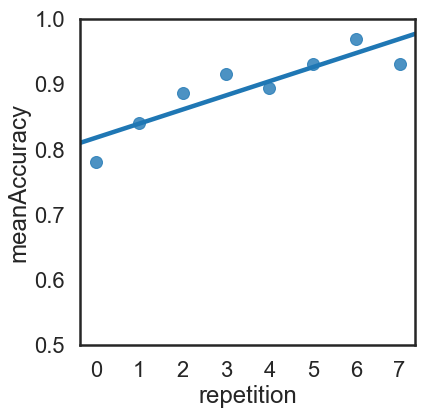

In [39]:
# plot mean accuracy across repetitions 
reload(h)
h.plot_accuracy_reps(D_run3)

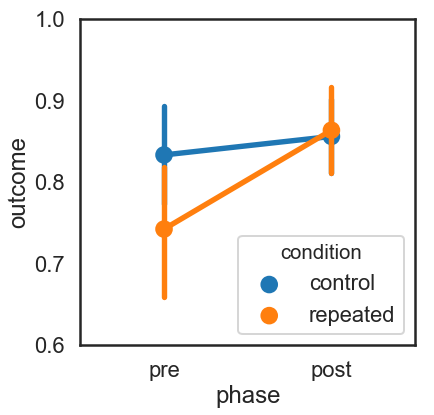

In [43]:
# plot mean accuracy across pre and post phases 
reload(h)
h.plot_accuracy_phase(D_run3)

## visualizing change over time

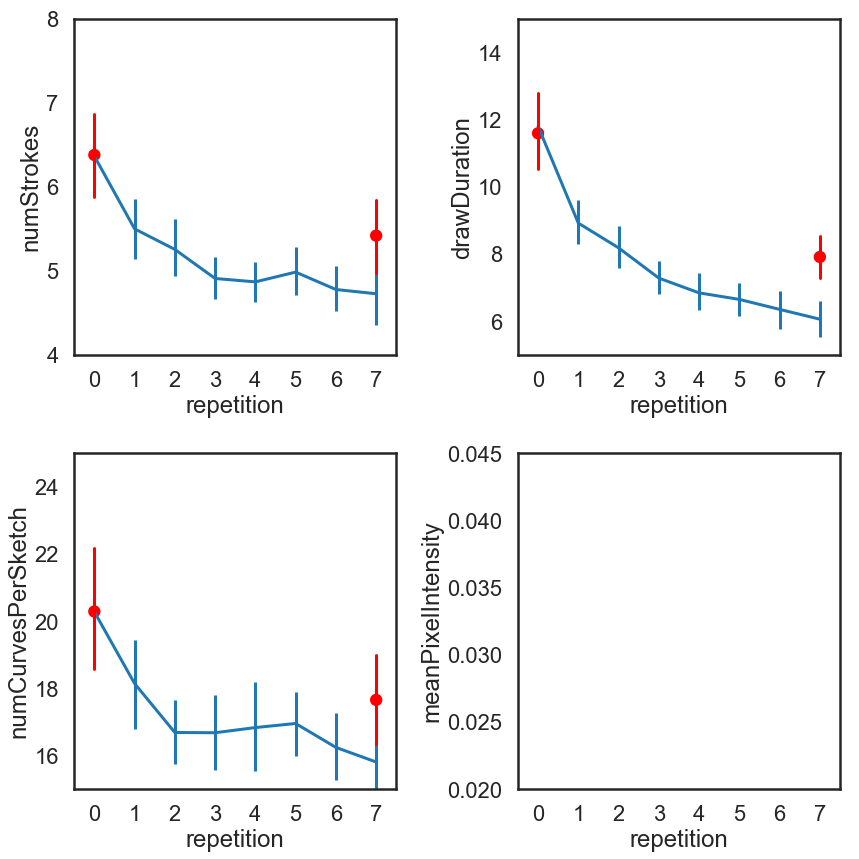

In [44]:
### across repetitions 
reload(h)
var0='numStrokes'
var1='drawDuration'
var2='numCurvesPerSketch'
var3= 'meanPixelIntensity'
h.ts_grid_repeated_control(D_run3_normalized, 
                                                var0, var1, var2, var3,
                                                numReps=8,
                                                 save_plot=False,
                                                 plot_dir=plot_dir)

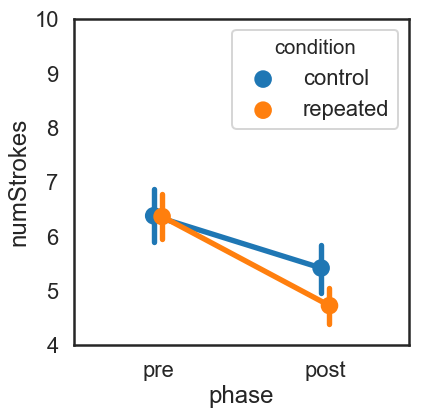

In [45]:
### pre and post comparison 
reload(h)
D1 = h.compare_conditions_prepost(D_run3_normalized,
                                var='numStrokes',
                                lower_limit = 4,
                                upper_limit=10,
                                save_plot=False,
                                plot_dir=plot_dir)

In [ ]:
### print repeated sketches (with actual image)
reload(h)
h.print_repeated_actual(D_run3,
                                   _complete_games,
                                   4)

In [ ]:
### print repeated sketches (with control sketches)
reload(h)
h.print_repeated_control(D_run3,
                                   _complete_games,
                                  4)

In [67]:
def save_sketches_to_final(D, complete_games, sketch_dir, iterationNum):
    for g in complete_games:
        print "saving sketches from game: {}".format(g)
        if g in list(D['gameID']):
            _D = D[D['condition'] == 'repeated']
            for i,_d in _D.iterrows():
                imgData = _d['png']
                trialNum = _d['trialNum']
                target = _d['target']
                repetition = _d['repetition']
                filestr = base64.b64decode(imgData)
                fname = 'sketch.png'
                with open(fname, "wb") as fh:
                    fh.write(imgData.decode('base64'))
                im = Image.open(fname)
                #im = im.convert("RGB")
                ### saving sketches to sketch_dir 
                filepath = os.path.join('{}_{}_{}_{}_{}.png'.format(g,trialNum,target, repetition, iterationNum))     
                if not os.path.exists(os.path.join(sketch_dir,'final')):
                    os.makedirs(os.path.join(sketch_dir,'final'))
                im.save(os.path.join(sketch_dir,'final',filepath))

In [68]:
save_sketches_to_final(D_run3_filtered, run3_complete_games, sketch_dir, 'run3')

saving sketches from game: 7053-d1f771d6-a55b-4681-961f-5a9ebb43cbdb
saving sketches from game: 3558-8fa206a2-9b8c-4d67-a4ab-0832dc0d0f25
saving sketches from game: 6964-d6de9966-f3dd-45df-8d24-d5bfd5d46eb8
saving sketches from game: 4853-a05bfdd7-095c-4b93-bdde-2b99fd29c7a2
saving sketches from game: 5616-7114c020-0e81-482c-952b-b26fc66076a0
saving sketches from game: 9817-6f2a66db-fc24-482d-aa20-1980ad6f524e
saving sketches from game: 7527-5ab8c64c-3f95-4864-bb6a-f9cad4b0d34e
saving sketches from game: 1820-86afdf51-4b4c-43a9-a9e1-e6e20618de1b
saving sketches from game: 7438-c77fa69e-d41c-41a4-b530-fc2809c07323
saving sketches from game: 9075-d6c9b0a6-bfb2-4148-ae19-d0da518aef97
saving sketches from game: 7637-26870e81-faae-4521-a2e9-10424526a22c
saving sketches from game: 4395-6cdb78e3-0c3f-4526-9670-8e4c1dcbc542
saving sketches from game: 3480-03933bf3-5e7e-4ecd-b151-7ae57e6ae826
saving sketches from game: 7360-1ccf92da-d46d-4315-8c81-6620388ee62f
saving sketches from game: 8103-96